In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



## Obtendo dados

In [ ]:
import os
import zipfile
from google.colab import files
uploaded = files.upload()

In [ ]:
local_zip = '/content/blood.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [ ]:
# Unused
# from google.colab import files
# uploaded = files.upload()



In [ ]:
# Unused
# tar = tarfile.open('/content/blood.tar.xz')
# tar.getnames()

In [ ]:
# Extraindo arquivos - Unused
# !tar xf blood.tar.xz --wildcards 'blood/*'


In [ ]:
# Diretorio com imagens de treino de eosinofilo
train1 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/eosinofilo')
# Diretorio com imagens de validação de eosinofilo 
valid1 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/eosinofilo')

# Diretorio com imagens de treino de linfocito
train2 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/linfocito')
# Diretorio com imagens de validação de linfocito 
valid2 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/linfocito')

# Diretorio com imagens de treino de monocito
train3 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/monocito')
# Diretorio com imagens de validação de monocito 
valid3 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/monocito')

# Diretorio com imagens de treino de neutrofilo
train4 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train/neutrofilo')
# Diretorio com imagens de validação de neutrofilo 
valid4 = os.path.join('/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/neutrofilo')

print('total train eosinofilo:', len(os.listdir(train1)))
print('total valid eosinofilo:', len(os.listdir(valid1)))

print('total train linfocito:', len(os.listdir(train2)))
print('total valid linfocito:', len(os.listdir(valid2)))

print('total train monocito:', len(os.listdir(train3)))
print('total valid monocito:', len(os.listdir(valid3)))

print('total train neutrofilo:', len(os.listdir(train4)))
print('total valid neutrofilo:', len(os.listdir(valid4)))

## Normalização e Input dos dados

In [53]:
# Normalização dos dados (RGB = 255)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Treinamento com os dados do drive
# train_generator = train_datagen.flow_from_directory(
#         '/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/train',  # This is the source directory for training images
#         classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
#         target_size=(200, 200),  # All images will be resized to 200x200
#         batch_size=10,
#         class_mode='categorical')

# Treinamento com os dados a partir do zip
train_generator = train_datagen.flow_from_directory(
        '/content/blood/train',  # This is the source directory for training images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical')

# Validação com os dados do drive
# validation_generator = validation_datagen.flow_from_directory(
#         '/content/drive/MyDrive/TCC2020/blood/dados_bood/blood/valid/',  # This is the source directory for validating images
#         classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
#         target_size=(200, 200),  # All images will be resized to 200x200
#         batch_size=10,
#         class_mode='categorical',
#         shuffle=True)

# Validação com os dados do zip
validation_generator = validation_datagen.flow_from_directory(
        '/content/blood/valid',  # This is the source directory for validating images
        classes = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        class_mode='categorical',
        shuffle=True)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [156]:
train_generator.image_shape

(200, 200, 3)

## Rede Neural Simples

In [161]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10

model = models.Sequential([
        layers.Flatten(input_shape=(200,200,3)),
        layers.Dense(3000, activation='relu'), # primeiro argumento é a quantidade de neurons
        layers.Dense(1000, activation='relu'),
        layers.Dense(4, activation='sigmoid') # o ultimo tem 10, pois é a quantidade de classes    
    ])


model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(train_generator, epochs=5)

In [ ]:
model.evaluate(train_generator)

## Arquitetura da Rede

In [166]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

def buid_model(shape=(200,200,3)):
    #Constroi as camadas da rede e retorna o build do modelo

    model = tf.keras.models.Sequential()

    # Primeira camada add o shape do input
    model.add(Conv2D(filters=32, kernel_size=10, activation='relu',input_shape=shape))
    # Tamanho downsampling - redução da "resolução"
    model.add(MaxPooling2D(pool_size=3))
    # Fração das unidades que serão zeradas para evitar overfitting
    model.add(Dropout(0.3))

    # Segunda Camada
    model.add(Conv2D(filters=256, kernel_size=6, activation='relu'))
    model.add(MaxPooling2D(pool_size=3))
    model.add(Dropout(0.3))

    # Terceira Camada
    model.add(Conv2D(filters=256, kernel_size=4, activation='relu'))
    model.add(MaxPooling2D(pool_size=3))
    model.add(Dropout(0.3))

    # Transformando o output em array
    model.add(Flatten())

    # Camada full-connected
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Camada de saida com o resultado das classes - 4 classes
    model.add(Dense(4, activation='sigmoid'))

    return model


    

In [167]:
model = buid_model()


In [168]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 191, 191, 32)      9632      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 58, 58, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 19, 19, 256)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 19, 19, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 256)     

## Compilação
Compilar o modelo definindo: otimizador,metrica e loss function



*   Loss: iremos usar o categorical ao invés do binário pois temos 4 classes






In [169]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# model.compile(optimizer=tf.optimizers.Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

## Treinamento

Verificar posteriormente a parte de callbacks

In [170]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint('chest_orientation_model.hdf5',
                            monitor='val_loss',
                            verbose=1, mode='min',
                            save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.001,
                           patience=8,
                           mode='min',
                           verbose=1)

In [171]:
model.fit(train_generator,
          steps_per_epoch = train_generator.samples//40,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//40,
          epochs=20,
          callbacks=[checkpoint, early_stop])

Epoch 1/20
248/248 [==============================] - 9s 32ms/step - loss: 1.4007 - accuracy: 0.2467 - val_loss: 1.3881 - val_accuracy: 0.2371

Epoch 00001: val_loss improved from inf to 1.38807, saving model to chest_orientation_model.hdf5
Epoch 2/20
248/248 [==============================] - 8s 32ms/step - loss: 1.3864 - accuracy: 0.2605 - val_loss: 1.3882 - val_accuracy: 0.2435

Epoch 00002: val_loss did not improve from 1.38807
Epoch 3/20
248/248 [==============================] - 8s 32ms/step - loss: 1.3867 - accuracy: 0.2665 - val_loss: 1.3856 - val_accuracy: 0.2645

Epoch 00003: val_loss improved from 1.38807 to 1.38557, saving model to chest_orientation_model.hdf5
Epoch 4/20
248/248 [==============================] - 8s 32ms/step - loss: 1.3862 - accuracy: 0.2556 - val_loss: 1.3870 - val_accuracy: 0.2645

Epoch 00004: val_loss did not improve from 1.38557
Epoch 5/20
248/248 [==============================] - 8s 32ms/step - loss: 1.3875 - accuracy: 0.2492 - val_loss: 1.3851 - va

In [172]:
model.evaluate(validation_generator)

249/249 [==============================] - 5s 20ms/step - loss: 1.3868 - accuracy: 0.2509


[1.3868333101272583, 0.25090470910072327]

## Avaliação

In [176]:
import glob
from keras import models
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

In [260]:
test_set = glob.glob('/content/comum/*jpeg')
# Carregar o modelo com melhor loss
model = load_model('chest_orientation_model.hdf5')

image_test = np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(image_name, target_size=(200,200), color_mode = 'rgb'))/255 for image_name in test_set])
y_pred = model.predict(image_test)

In [265]:
y_pred[15]

array([0.5475406 , 0.44579253, 0.5043565 , 0.5208959 ], dtype=float32)

In [266]:
 np.argmax(y_pred[15])

0

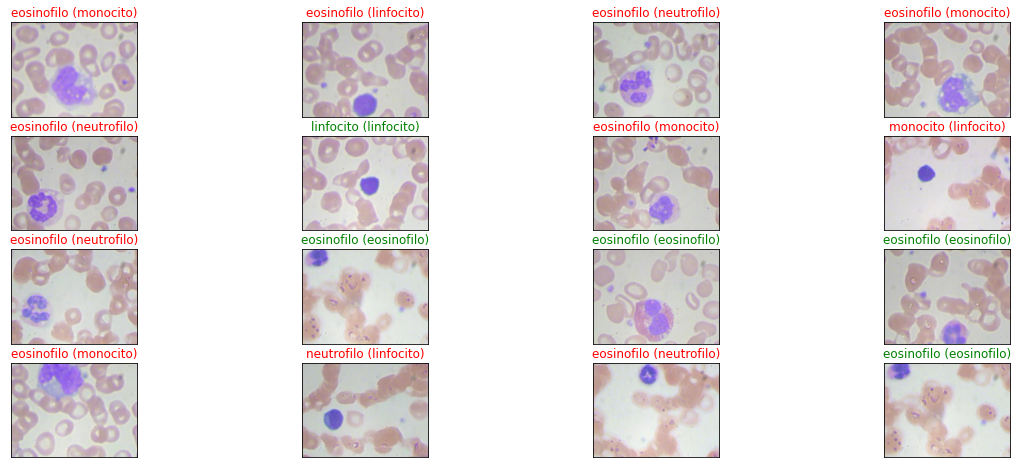

In [286]:
y_true = [2,1,3,2,3,1,2,1,3,0,0,0,2,1,3,0] #referente as classes no dataset
labels = ['eosinofilo', 'linfocito', 'monocito', 'neutrofilo']
# e = 0, 

figure = plt.figure(figsize=(20,8))

for i in range(16):
    ax = figure.add_subplot(4,4,i+1, xticks=[], yticks=[])
    # Display image
    im = plt.imread(test_set[i])
    ax.imshow(im)
    predict_index = np.argmax(y_pred[i])
    true_index = y_true[i]
    # Set the title for each image
    ax.set_title("{}".format(labels[true_index]))
    # print(predict_index)
    ax.set_title(f"{labels[predict_index]} ({labels[true_index]})",
                                 color=("green" if predict_index == true_index else "red"))

Saving e4.jpeg to e4 (1).jpeg
[0.99965644 0.9999999  0.15269218 0.1977685 ]
1
e4.jpeg is a linfocito


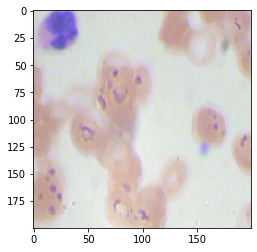

In [308]:
# Verificando imagem a imagem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(np.argmax(classes[0]))
  if np.argmax(classes[0]) == 1:
    print(fn + " is a linfocito")

  if np.argmax(classes[0]) == 2:
    print(fn + " is a monocito")

  if np.argmax(classes[0]) == 3:
    print(fn + " is a neutrofilo")

  if np.argmax(classes[0]) == 0:
    print(fn + " is a eosinofilo")

In [259]:
# Auxiliar
local_zip = '/content/comum.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()